In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df1 = pd.read_csv("Australian_Travel_Survey_Data.csv")

In [3]:
df1.head()

,PERSONID,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME
0,Y09H151315P01,40,2,1,1,4,0,1,2100106,1500,21001,158,20101,213,Victoria,0,35
1,Y09H151324P01,73,1,2,1,2,1,1,2100108,703,21001,158,20101,213,Victoria,0,100
2,Y09H151340P01,85,2,2,1,1,1,1,2100108,703,21001,158,20101,213,Victoria,0,35
3,Y09H151329P01,34,2,1,1,3,1,3,2100108,703,21001,158,20101,213,Victoria,0,79
4,Y09H151325P01,68,1,2,1,3,2,3,2100108,703,21001,158,20101,213,Victoria,0,97


In [4]:
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sn
from sklearn.preprocessing import LabelEncoder

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PERSONID            41544 non-null  object
 1   AGE                 41544 non-null  int64 
 2   GENDER              41544 non-null  int64 
 3   ANYWORK             41544 non-null  int64 
 4   CARLICENCE          41544 non-null  int64 
 5   HHSTRUCTURE         41544 non-null  int64 
 6   HH_CARS             41544 non-null  int64 
 7   HHINC_grp           41544 non-null  int64 
 8   SA1_code            41544 non-null  int64 
 9   PopDensity_SA1      41544 non-null  int64 
 10  SA2_code            41544 non-null  int64 
 11  PopDensity_SA2      41544 non-null  int64 
 12  SA3_code            41544 non-null  int64 
 13  PopDensity_SA3      41544 non-null  int64 
 14  STATE               41544 non-null  object
 15  ACTIVE_TRAVEL_TIME  41544 non-null  int64 
 16  CAR_TIME            41

In [6]:
#encoding state

encode = LabelEncoder()
encode.fit(df1['STATE'])
df1['STATE'] = encode.transform(df1['STATE'])

In [7]:
dup = df1[df1.duplicated()]

In [8]:
#encodjing the personID

In [9]:
encode = LabelEncoder()
encode.fit(df1['PERSONID'])
df1['PERSONID'] = encode.transform(df1['PERSONID'])

In [10]:
target = df1['ACTIVE_TRAVEL_TIME']

In [11]:
df1.drop('ACTIVE_TRAVEL_TIME',axis = 1,inplace = True)

In [12]:
df1.head()

,PERSONID,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,CAR_TIME
0,23244,40,2,1,1,4,0,1,2100106,1500,21001,158,20101,213,1,35
1,23249,73,1,2,1,2,1,1,2100108,703,21001,158,20101,213,1,100
2,23260,85,2,2,1,1,1,1,2100108,703,21001,158,20101,213,1,35
3,23253,34,2,1,1,3,1,3,2100108,703,21001,158,20101,213,1,79
4,23251,68,1,2,1,3,2,3,2100108,703,21001,158,20101,213,1,97


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PERSONID        41544 non-null  int32
 1   AGE             41544 non-null  int64
 2   GENDER          41544 non-null  int64
 3   ANYWORK         41544 non-null  int64
 4   CARLICENCE      41544 non-null  int64
 5   HHSTRUCTURE     41544 non-null  int64
 6   HH_CARS         41544 non-null  int64
 7   HHINC_grp       41544 non-null  int64
 8   SA1_code        41544 non-null  int64
 9   PopDensity_SA1  41544 non-null  int64
 10  SA2_code        41544 non-null  int64
 11  PopDensity_SA2  41544 non-null  int64
 12  SA3_code        41544 non-null  int64
 13  PopDensity_SA3  41544 non-null  int64
 14  STATE           41544 non-null  int32
 15  CAR_TIME        41544 non-null  int64
dtypes: int32(2), int64(14)
memory usage: 4.8 MB


In [14]:
x_std = StandardScaler().fit_transform(df1)

In [15]:
mean_vec = np.mean(x_std, axis = 0)
cov_mat = (x_std - mean_vec).T.dot((x_std-mean_vec))/(x_std.shape[0]-1)
print(f"Covariance Matrix \n\n {cov_mat}")

Covariance Matrix 

 [[ 1.00002407e+00  6.49726629e-02  2.82611484e-03  6.14583067e-02
  -3.82996053e-02  3.95028888e-03  3.90152020e-04 -1.10194101e-01
   5.25597152e-01 -2.58200857e-01  5.25596618e-01 -4.10374696e-01
   5.26125514e-01 -4.10470194e-01 -5.24807688e-01  1.34047326e-02]
 [ 6.49726629e-02  1.00002407e+00 -3.09912182e-02  5.02149066e-01
   4.20931443e-02 -3.26341779e-01 -1.52093394e-01 -3.14706690e-01
   1.59237580e-02 -6.11998237e-02  1.59239256e-02 -6.75232802e-02
   1.67848588e-02 -5.25368278e-02 -1.56327127e-02 -3.63631824e-02]
 [ 2.82611484e-03 -3.09912182e-02  1.00002407e+00  1.10094831e-01
   5.70993643e-02  2.42338803e-02 -4.10509374e-02 -5.61175356e-02
   4.80063501e-03  6.97943723e-03  4.80061869e-03  8.42439144e-03
   4.49518221e-03  8.40267834e-03 -4.93526299e-03 -5.15474833e-02]
 [ 6.14583067e-02  5.02149066e-01  1.10094831e-01  1.00002407e+00
   1.39330335e-01 -1.57447501e-01 -1.87209698e-01 -3.99614931e-01
   2.28247180e-02 -3.00304556e-02  2.28245030e-02 -6

In [16]:
#eigendecomposition

cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(f"Eigenvectors \n {eig_vecs}")
print(f"\n Eigenvalues \n \n {eig_vals}")

Eigenvectors 
 [[-3.22773697e-01 -1.86266872e-01  3.94144325e-02 -5.14883609e-02
   4.36573686e-02  9.40243605e-02 -1.16267280e-03  1.35342250e-01
  -3.44421158e-01  1.65344596e-01 -1.80873964e-01  8.05698864e-01
   1.55127374e-03 -4.29882749e-03  3.38420470e-04 -5.20098446e-07]
 [-2.89003594e-02 -2.24693835e-01 -3.89781031e-01  3.58031840e-01
  -1.97009623e-01 -1.87506179e-01  2.67873000e-01 -2.26901692e-01
  -4.45984509e-02 -6.27719710e-01 -2.53578213e-01  1.02356714e-01
  -2.34486287e-02  1.23923735e-04  4.84066116e-05  2.94037316e-07]
 [-2.99663349e-03 -4.96007227e-03 -7.69709901e-02 -3.95868449e-01
  -7.47532120e-01  1.75923745e-01 -4.59790154e-01 -1.35895945e-01
  -2.57773968e-02 -1.25440961e-01 -2.27531796e-02  2.78792222e-02
  -2.64375983e-03 -2.67459864e-04  1.19112600e-05  2.35390517e-08]
 [-3.19347848e-02 -2.09967258e-01 -4.21735453e-01  3.91455546e-02
  -3.58405474e-01 -2.55715395e-01  3.09428430e-01  9.98659100e-02
   1.24597195e-03  6.61617069e-01 -1.05868194e-01 -1.64272

In [17]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('EIghenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    
#pca = PCA(n_components)

EIghenvalues in descending order:
4.482304169858589
2.337320848643489
2.2668166726246937
1.1947611575618715
0.9993714095443107
0.8783217446066421
0.9102091145889812
0.7242056461315522
0.6244153801191473
0.430056669315788
0.5056693582846334
0.4928787024730737
0.14974402556438568
0.004304031096440658
6.212370737098197e-06
3.204013352397215e-10


In [18]:
pca = PCA(n_components = 5)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[9.99575704e-01 3.95934377e-04 2.14685119e-05 5.65554357e-06
 8.11340353e-07]


In [19]:
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n\n",var_exp)
print("\n Cumulative variance captured as we travel with each component \n\n",cum_var_exp)

Variance captured by each component is 

 [28.013726730760652, 14.607903670685962, 14.167263177421471, 7.467077491423674, 6.2459209613150035, 5.688670031678768, 5.489378766517686, 4.526176336721768, 3.9025021868816387, 3.16035741491228, 3.0804177403534347, 2.687789484249497, 0.9358776318513612, 0.026899546841817442, 3.8826382499769865e-05, 2.002460143140969e-09]

 Cumulative variance captured as we travel with each component 

 [ 28.01372673  42.6216304   56.78889358  64.25597107  70.50189203
  76.19056206  81.67994083  86.20611717  90.10861935  93.26897677
  96.34939451  99.03718399  99.97306162  99.99996117 100.
 100.        ]


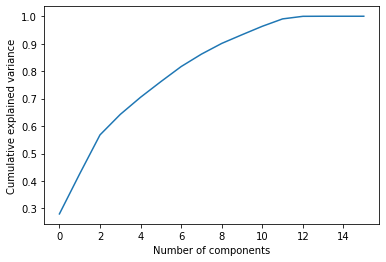

In [20]:
#exlain variance

pca = PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

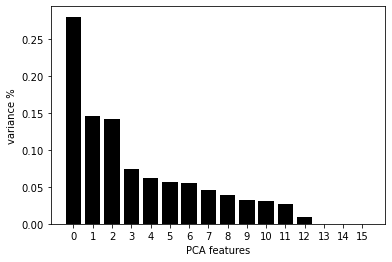

In [21]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
pca_components=pd.DataFrame(columns=['pca'])
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

NameError: name 'df22' is not defined

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pcs = pca.fit_transform(df1)
df_new = pd.DataFrame(data=pcs, columns={'PC1','PC2','PC3'})
df_new['target'] = target
df_new.head()

,PC3,PC1,PC2,target
0,-418161.941451,-8790.762467,-733.464797,0
1,-418159.521002,-8842.741642,-1464.707614,0
2,-418159.386318,-8853.691313,-1463.666675,0
3,-418159.472045,-8846.718625,-1464.320512,0
4,-418159.496506,-8844.732202,-1464.535444,0


In [31]:
df_new

,PC3,PC1,PC2,target
0,-418161.941451,-8790.762467,-733.464797,0
1,-418159.521002,-8842.741642,-1464.707614,0
2,-418159.386318,-8853.691313,-1463.666675,0
3,-418159.472045,-8846.718625,-1464.320512,0
4,-418159.496506,-8844.732202,-1464.535444,0
...,...,...,...,...
41539,626303.931656,-4815.476920,-1060.507180,0
41540,626303.625316,-4790.581468,-1062.474621,0
41541,626303.613090,-4789.587136,-1062.596927,0
41542,626305.369590,-4870.951892,-1877.090725,0


In [32]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling

In [33]:
df_new.columns

Index(['PC3', 'PC1', 'PC2', 'target'], dtype='object')

In [34]:
features = df_new[['PC1','PC2','PC3']]

In [35]:
clustering_kmeans = KMeans(n_clusters=5, precompute_distances="auto", n_jobs=-1)

df_new['cluster'] = clustering_kmeans.fit_predict(features)

C:\Users\bhave\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
C:\Users\bhave\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [40]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_new)
    distortions.append(kmeanModel.inertia_)

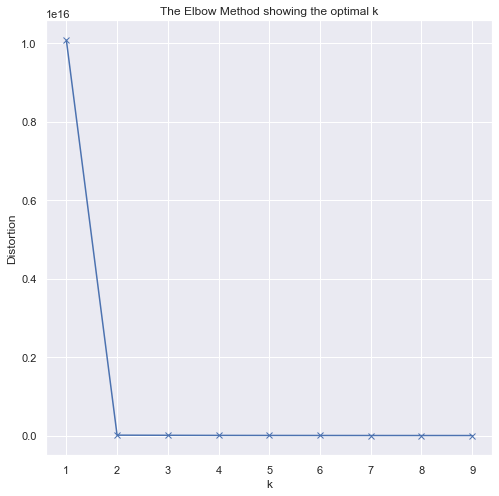

In [42]:
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [51]:
kmeanModel = KMeans(n_clusters=1)
kmeanModel.fit(df_new)

KMeans(n_clusters=1)

In [52]:
df_new['k_means']=kmeanModel.predict(df_new)

In [53]:
df_new['target'] = target

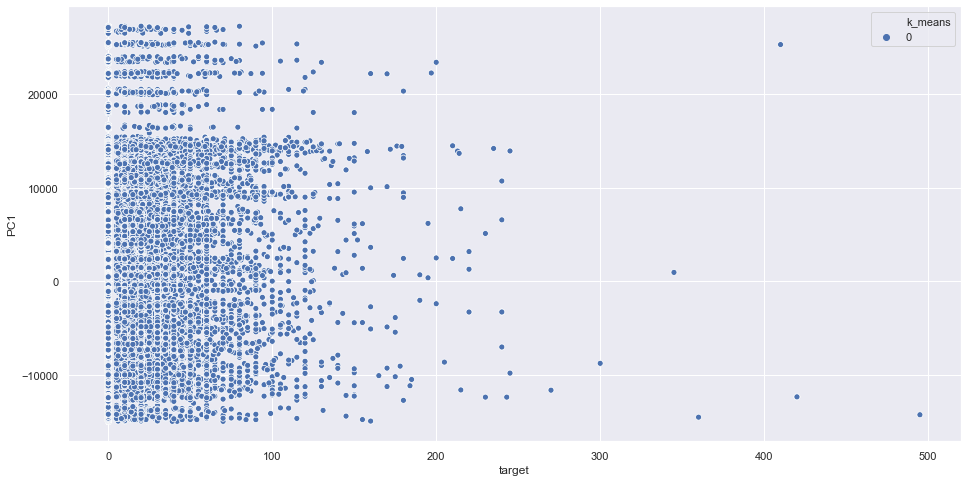

In [59]:
fig, axes = plt.subplots(figsize=(16,8))
sns.scatterplot(x="target", y="PC1", hue=df_new['k_means'], data=df_new)
plt.show()

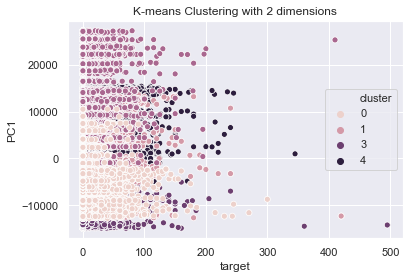

In [63]:
sns.scatterplot(x="target", y="PC1", hue=df_new['cluster'], data=df_new)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

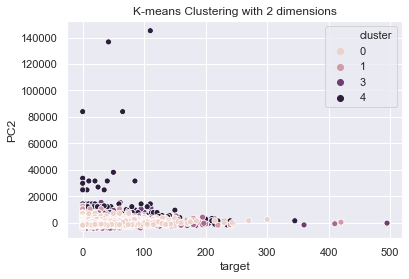

In [64]:
sns.scatterplot(x="target", y="PC2", hue=df_new['cluster'], data=df_new)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

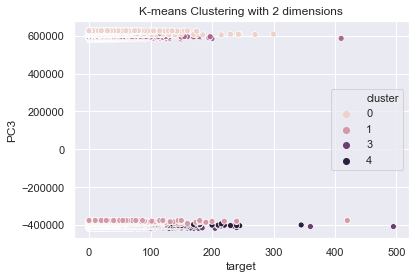

In [65]:
sns.scatterplot(x="target", y="PC3", hue=df_new['cluster'], data=df_new)
plt.title('K-means Clustering with 2 dimensions')
plt.show()